# Data analysis

In this notebook, we will explore the spatial clustering of air pollutant concentrations (PM2.5 and O3) across New York City and attempt to explain the differences in neighborhoods by external factors (e.g., boiler emissions, traffic density). We will also determine which factors have the most significant impact.
In a second phase, we will analyze spatial clustering of air pollutant health outcomes such as mortality rates, and disease occurrences. And we will study the most impactful factors in these spatial clusters.

We mainly have data from between 2015 and 2017; thus, we will focus on that period of time. 
The analyzed data is as follows:


- Health outcomes related to PM2.5 between 2015 to 2017 :
     - Asthma Emergency Department Visits
     - Asthma Hospitalizations
     - Deaths

- Health outcomes related to O3 between 2015 to 2017 :
     - Asthma Emergency Department Visits
     - Respiratory and Cardiovascular Hospitalizations
     - Deaths

- Concentration of O3 between 2015 and 2017
- Concentration of PM2.5 between 2015 and 2017

In [50]:
import warnings
warnings.filterwarnings("ignore")
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
air_quality_df = pd.read_csv('final-dataset.csv',sep=",")

## 1. Concentrations clustering:

### a. PM2.5 Concentration:

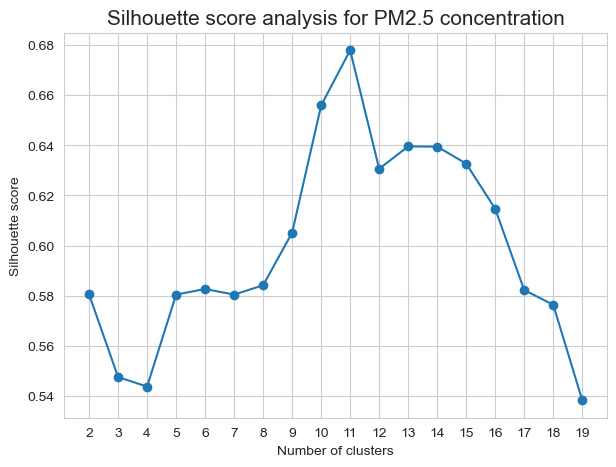

In [52]:
# searching for best nb of clusters based on Silhouette score
best_nb_cluster_pm2_5_concentration = tools.best_nb_cluster(
    air_quality_df,
    ['PM2.5 Particles Concentration'],
    2,
    20,
    True,
    'Silhouette score analysis for PM2.5 concentration')

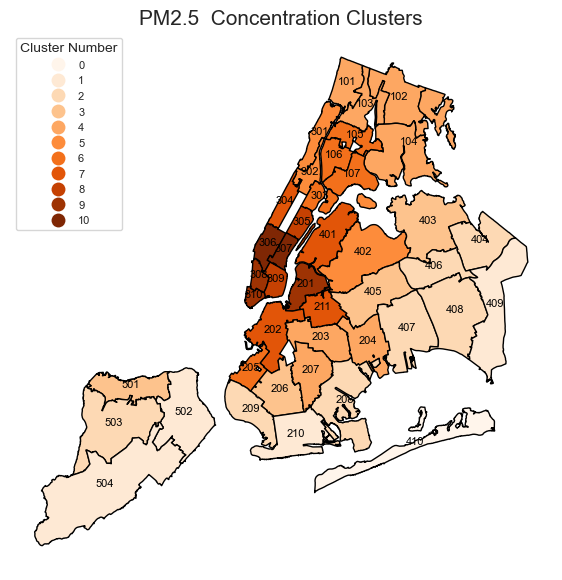

In [53]:
# clustering PM2.5 health outcomes
dic_reorder_pm2_5_concentration, cluster_labels_pm2_5_concentration = tools.clustering(air_quality_df, ['PM2.5 Particles Concentration'], best_nb_cluster_pm2_5_concentration, True)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_pm2_5_concentration, 
                             'PM2.5  Concentration Clusters',
                             dic_reorder_pm2_5_concentration)

We observe that central neighborhoods exhibited higher PM2.5 concentrations, whereas the southern areas displayed lower concentrations. This difference may be attributed to the higher concentration of humans, traffic, and vibrant activities in and around Manhattan and the Bronx, while in the south, there is less traffic and fewer activities (Queens and Staten Island).

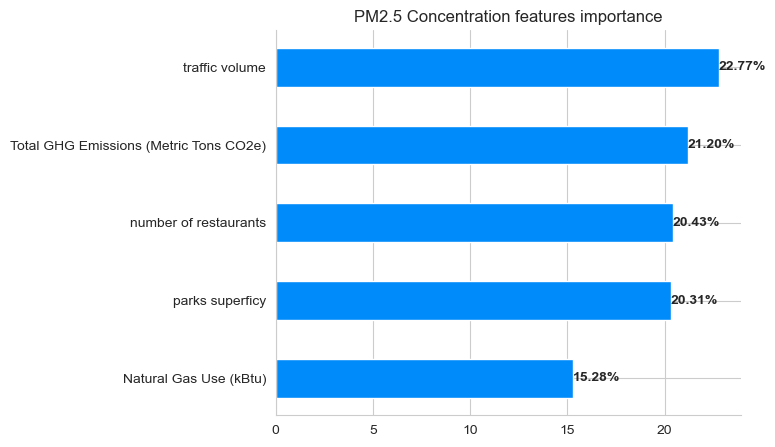

In [54]:
tools.feature_importance(
    air_quality_df, 
    ['Natural Gas Use (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'traffic volume'],
    cluster_labels_pm2_5_concentration,
    'PM2.5 Concentration features importance'
)

We observe that all factors contribute in the same way to the clustering of neighborhoods for PM2.5 concentration. Only the Natural Gas Use factor exhibits less contribution.

### b. O3 Concentration:

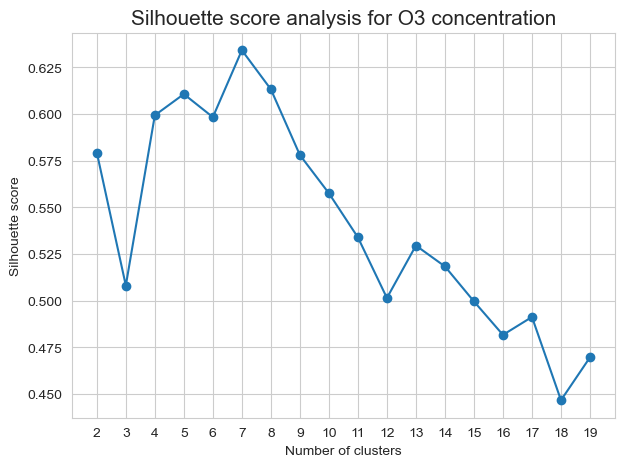

In [55]:
# searching for best nb of clusters based on Silhouette score
best_nb_cluster_o3_concentration = tools.best_nb_cluster(
    air_quality_df,
    ['O3 Particles Concentration'],
    2,
    20,
    True,
    'Silhouette score analysis for O3 concentration')

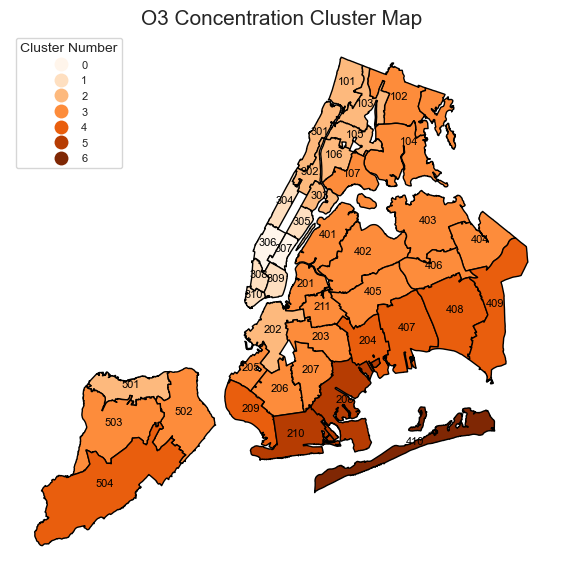

In [56]:
# clustering O3 health outcomes
dic_reorder_o3_concentration, cluster_labels_o3_concentration = tools.clustering(air_quality_df, ['O3 Particles Concentration'], best_nb_cluster_o3_concentration, True)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_o3_concentration, 
                             'O3 Concentration Cluster Map',
                             dic_reorder_o3_concentration)

In contrast, in the figure showing the concentration of O3 above. We observe that the clustering of neighborhoods is an opposite trend to that of PM2.5.
We observe that the central part of the city generally exhibits lower O3 concentrations. But the southern neighborhoods have the most important concentrations.

Air pollutants generally share the same contributing factors, it is unusual to have such disparities in the intensity of different air pollutants in neighborhoods. To understand why we observe such behavior, we will examine the correlation matrix to study how different factors interact with air pollutants (O3 and PM2.5).

In [57]:
# keeping only numeric and useful columns
numeric_columns = air_quality_df[['Natural Gas Use (kBtu)',
'Total GHG Emissions (Metric Tons CO2e)',
'number of restaurants',
'parks superficy',
'traffic volume',
'O3 Particles Concentration',
'PM2.5 Particles Concentration']]

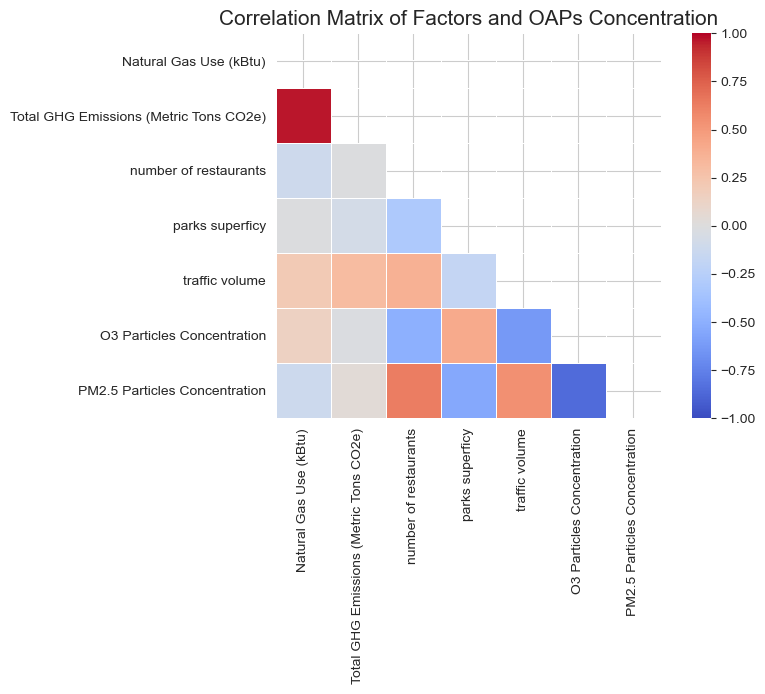

In [58]:
# calculate and plot the correlation matrix
corr = numeric_columns.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8, 5))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Factors and OAPs Concentration', fontsize=15)
plt.show()

For PM2.5, it increases with pollution factors and decreases with the size of green spaces. Surprisingly, for O3, it's the opposite: it decreases with pollution factors and increases with bigger green spaces. To figure out why this happens, we need to learn more about how O3 is formed.

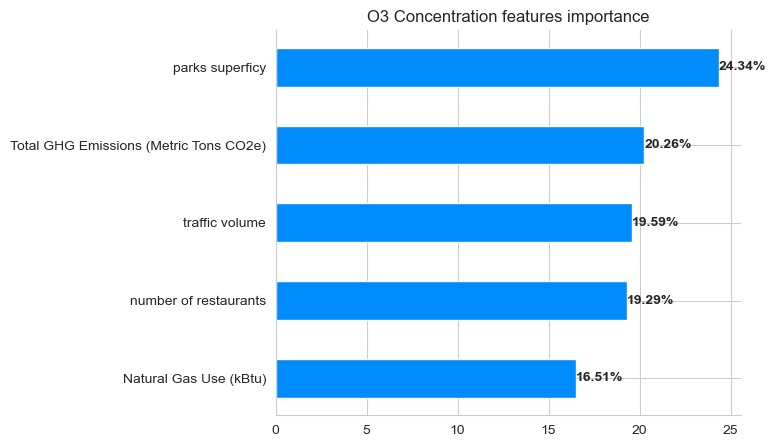

In [59]:
tools.feature_importance(
    air_quality_df, 
    ['Natural Gas Use (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'traffic volume'],
    cluster_labels_o3_concentration,
    'O3 Concentration features importance'
)

We also observe that park area is the most important factor contributing to predicting the cluster to which the neighborhood belongs. This raises the question of what the relationship is between green spaces and O3.

In fact, the high temperatures and the strong luminous radiation will support the chemical reactions in the low layers of the atmosphere producing ozone from the following primary pollutants:
- Nitrogen oxides (NOx) mainly from road traffic.
- The Volatile Organic Compounds (TVOC) which come from several sources and mainly from solvents and paints, industries, road traffic and green spaces.

According to a [research](https://www.sciencedirect.com/science/article/abs/pii/S0269749117309491), Neglecting VOCs emissions from urban green spaces leads to a 62% underestimation of the related health damage and and adopting proactive management (e.g. adjusting tree species composition) can reduce 61% of the BVOCs emissions and 50% of the health damage related to BVOCs emissions by 2050.


## 2. Health outcomes clustering:

### a. PM2.5 health outcomes:

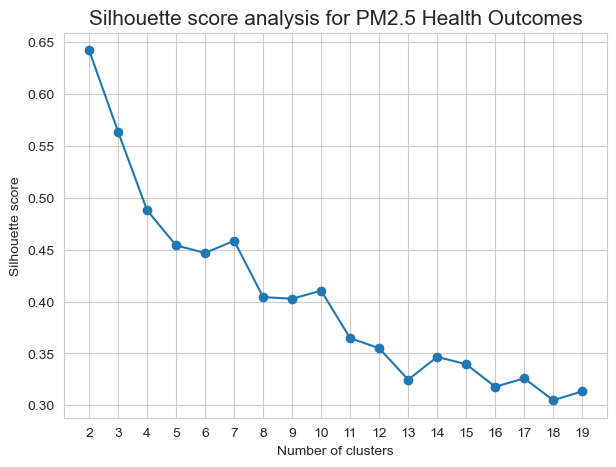

In [60]:
# searching for best nb of clusters based on Silhouette score
best_nb_cluster_pm2_5_health = tools.best_nb_cluster(
    air_quality_df,
    ['PM2.5 Attributable Deaths', 'PM2.5 Asthma Emergency Department Visits', 'PM2.5 Attributable Hospitalizations'],
    2,
    20,
    True,
    'Silhouette score analysis for PM2.5 Health Outcomes')

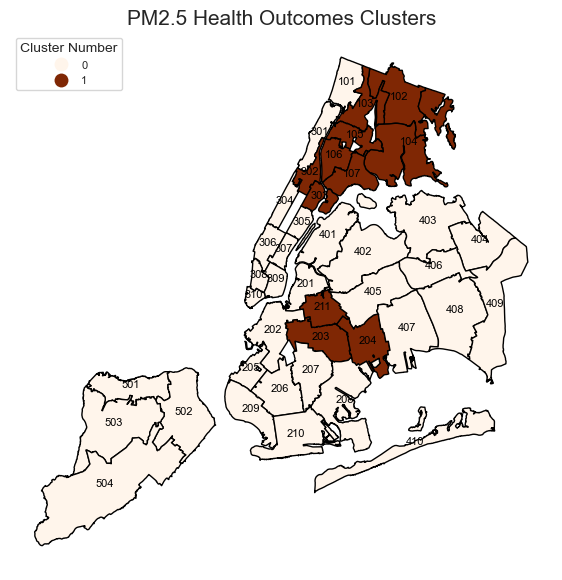

In [61]:
# clustering PM2.5 health outcomes
cluster_labels_pm2_5_health = tools.clustering(air_quality_df, 
                                               ['PM2.5 Attributable Deaths', 'PM2.5 Asthma Emergency Department Visits', 'PM2.5 Attributable Hospitalizations'],
                                               best_nb_cluster_pm2_5_health)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_pm2_5_health, 'PM2.5 Health Outcomes Clusters')

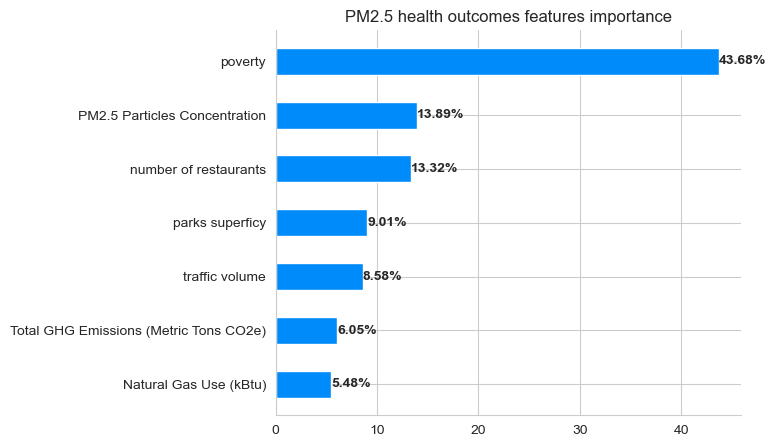

In [62]:
tools.feature_importance(
    air_quality_df, 
    ['Natural Gas Use (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'PM2.5 Particles Concentration','parks superficy', 'poverty', 'traffic volume'],
    cluster_labels_pm2_5_health,
    'PM2.5 health outcomes features importance'
)

### b. O3 health outcomes:

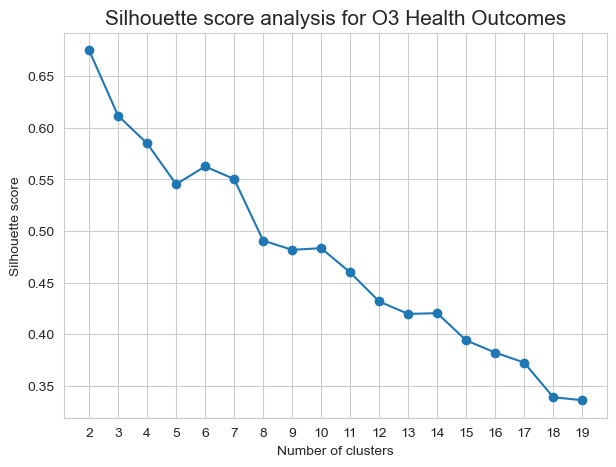

In [63]:
best_nb_cluster_o3_health = tools.best_nb_cluster(
    air_quality_df,
    ['O3 Attributable Deaths','O3 Particles Concentration', 'O3 Asthma Emergency Department Visits', 'O3 Attributable Hospitalizations'],
    2,
    20,
    True,
    'Silhouette score analysis for O3 Health Outcomes')

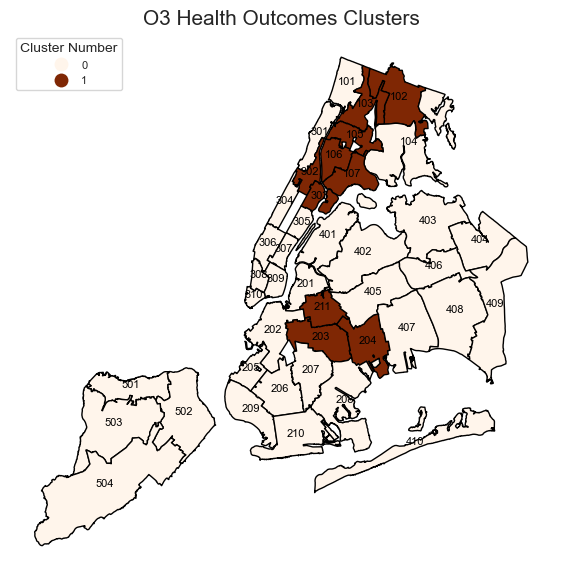

In [64]:
# clustering PM2.5 health outcomes
cluster_labels_o3_health = tools.clustering(air_quality_df, 
                                               ['O3 Attributable Deaths','O3 Particles Concentration', 'O3 Asthma Emergency Department Visits', 'O3 Attributable Hospitalizations'],
                                               best_nb_cluster_o3_health)

# visualizing the clusters on map
tools.visualize_clusters_map(cluster_labels_o3_health, 'O3 Health Outcomes Clusters')

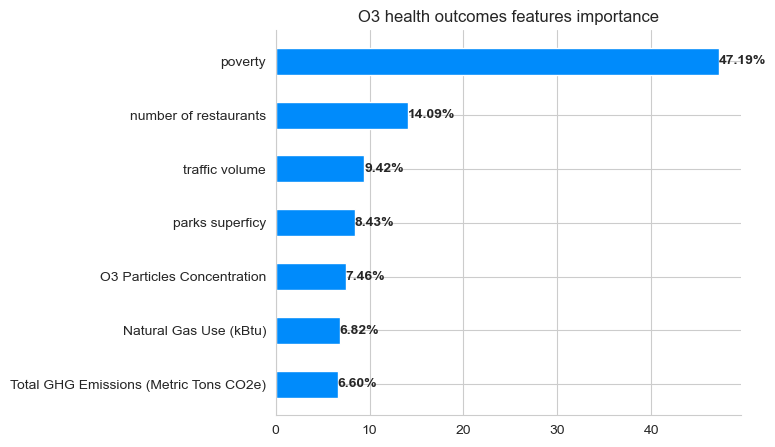

In [65]:
tools.feature_importance(
    air_quality_df, 
    ['Natural Gas Use (kBtu)', 'O3 Particles Concentration','Total GHG Emissions (Metric Tons CO2e)', 'number of restaurants', 'parks superficy', 'poverty', 'traffic volume'],
    cluster_labels_o3_health,
    'O3 health outcomes features importance'
)

The feature importance analysis, for both O3 and PM2.5 shows the major importance of poverty in the health outcomes related to air quality. Financial constraints hinder access to healthcare and preventive measures, exacerbating health disparities. Addressing these interconnected issues is vital to ensure better health outcomes for affected communities.

In fact, many researchers suggest that there is a strong link between socioeconomic factors and exposure to air pollution. Homes in lower-income neighborhoods are often older and in worse condition than homes in more affluent areas. This can lead to poor ventilation, which can trap indoor air pollutants and make it difficult to escape outdoor air pollution. Additionally, older homes may have more cracks and crevices where pollutants can enter.
Also, poor people are more likely to have jobs that expose them to air pollution, such as construction and transport. Finally, in the USA there is a remarkable lack of access to health insurance among people from lower socioeconomic backgrounds.